# Keep it Simple

As Antoine de Saint-Exupéry said: *Perfection is achieved, not when there is nothing more to add, but when there is nothing left to take away.* As @EdwardTufte has persuasively argued in his books, extraneous visual elements that distract from the message should be removed. For example: tick-marks, frames, sometimes even numbers! Lets us implement this process using matplotlib for a simple example...

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Here is a dataset on electoral votes and population in all the US states. We'll make a bar chart comparing the electoral votes of different states

In [2]:
combined = pd.read_csv("https://gist.githubusercontent.com/rahuldave/2256465a8524453cb2a4630d336f82f7/raw/bb55cbbc52440b31b94ac1410ada88ca657276d8/combined_population_votes.csv", index_col='State')
combined.head(10)

,Population,Votes,popmills
State,,,
Alaska,710000,3,0.710
Alabama,4780000,9,4.780
Arkansas,2916000,6,2.916
Arizona,6392000,11,6.392
California,37254000,55,37.254
Colorado,5029000,9,5.029
Connecticut,3574000,7,3.574
District of Columbia,602000,3,0.602
Delaware,898000,3,0.898


In [4]:
combined.shape

(51, 3)

In [5]:
combined.dtypes

Population      int64
Votes           int64
popmills      float64
dtype: object

In [3]:
# get a sorted pandas series for the electoral votes
votesasc = combined['Votes'].sort_values(ascending = True)
votesasc

State
Alaska                   3
Vermont                  3
South Dakota             3
North Dakota             3
Montana                  3
Delaware                 3
District of Columbia     3
Wyoming                  3
Hawaii                   4
Rhode Island             4
Idaho                    4
New Hampshire            4
Maine                    4
Nebraska                 5
New Mexico               5
West Virginia            5
Utah                     6
Arkansas                 6
Nevada                   6
Mississippi              6
Iowa                     6
Kansas                   6
Oregon                   7
Oklahoma                 7
Connecticut              7
Louisiana                8
Kentucky                 8
Colorado                 9
Alabama                  9
South Carolina           9
Wisconsin               10
Maryland                10
Minnesota               10
Missouri                10
Indiana                 11
Massachusetts           11
Arizona               

In this picture taken from https://end-to-end-machine-learning.teachable.com/p/navigating-matplotlib-tutorial-how-to/ by @brohrer, we see that (possibly multiple) Axes sit inside a Figure, and everything else (such as xaxis, yaxis, lines, patches, text, annotations) sits inside the Axes.

![](https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/images/visualization_communication/7.png)

This first snippet illustrates Matplotlib's object-oriented API. We first create a figure object, and in the context of that object, an axes object. Then pandas is used to place a bar plot into those axes. What's **not good** about this plot?

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._axes.Axes'>


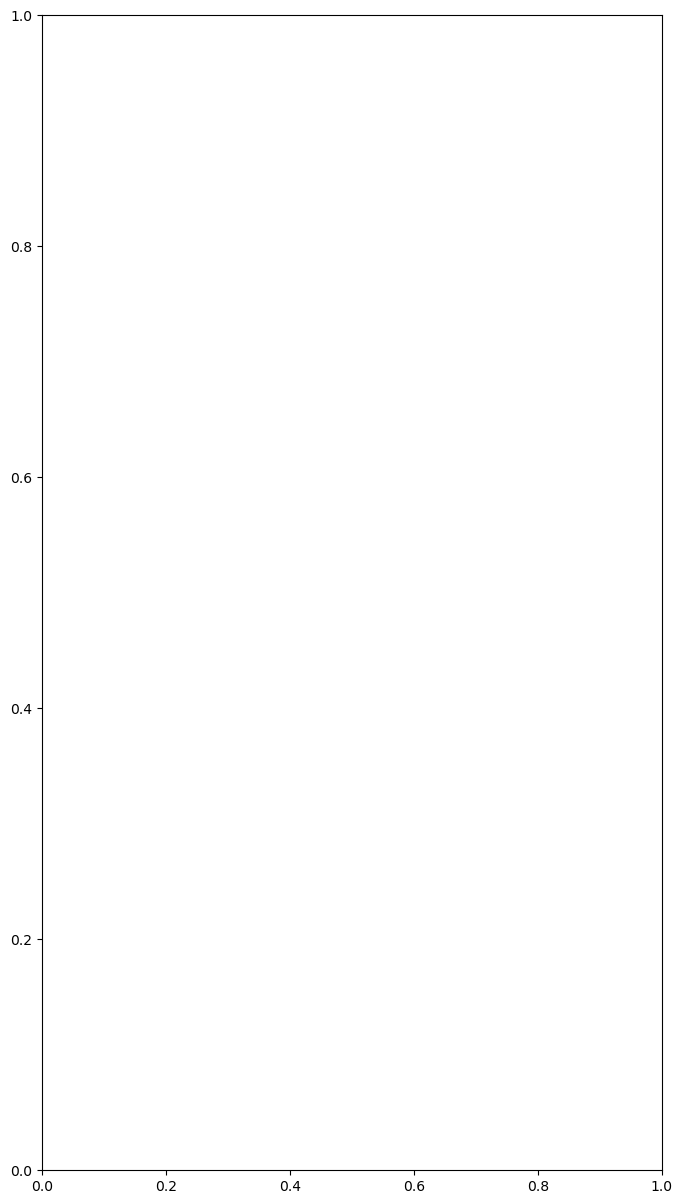

In [6]:
fig, ax = plt.subplots(figsize = (8, 15)) #8 is the width and 15 is the height (all in inches)
print(type(fig), type(ax))

Text(0.5, 0, 'Electoral Votes')

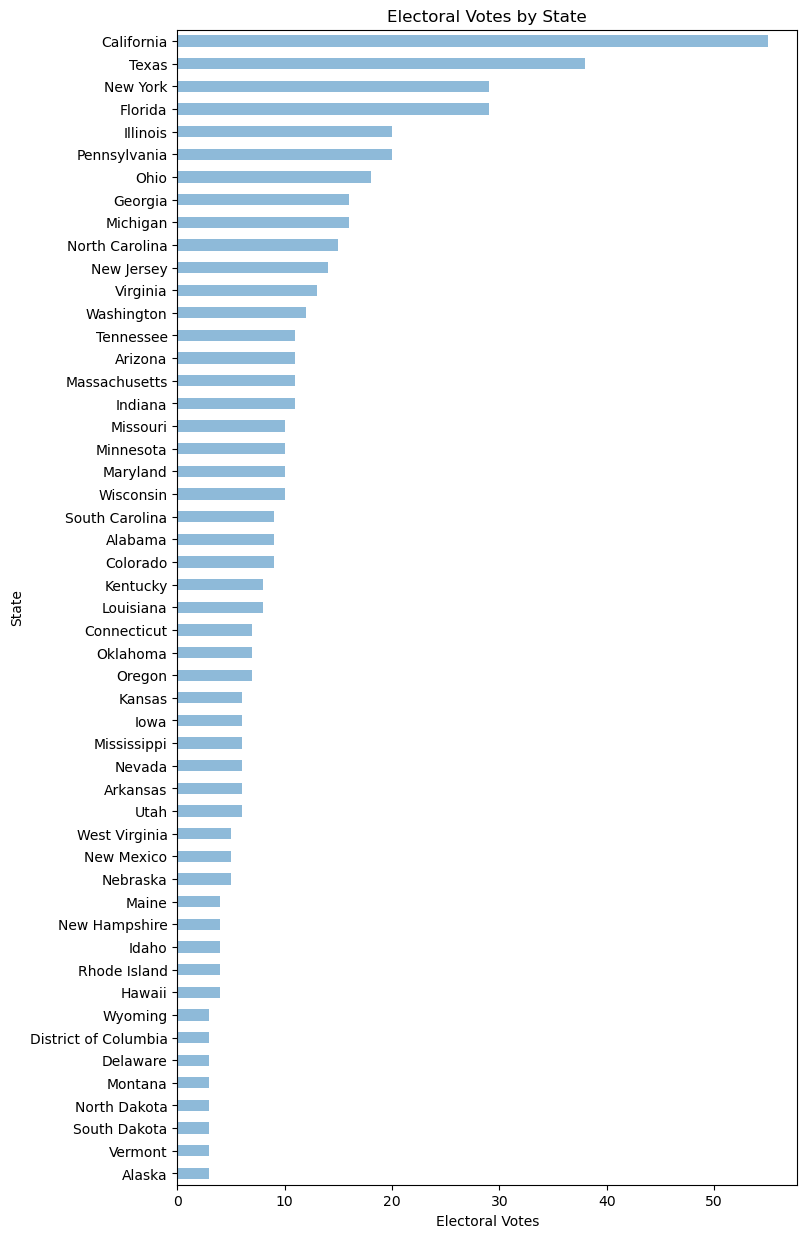

In [15]:
# get non-global figure and axis
fig, ax = plt.subplots(figsize = (8, 15))
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.5) #alpha sets the transparency and ranges from 0 to 1
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# Set the x-axis label
ax.set_xlabel("Electoral Votes")

## Improving the plot

There are many things wrong with this picture. Tick marks are not needed on the labeled y-axis. We do this in matplotlib by setting their length to 0. Note that we are not removing the ticks, but just the marks corresponding to them.


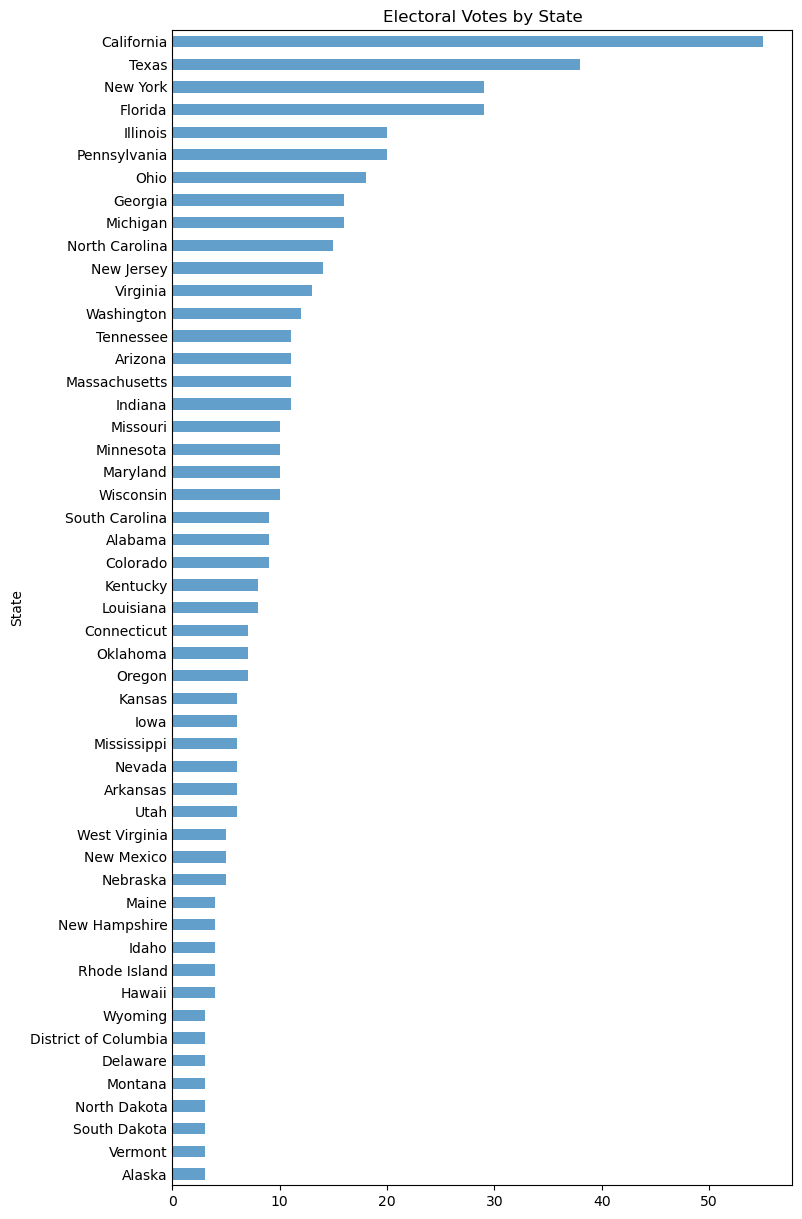

In [16]:
# get non-global figure and axis
fig, ax = plt.subplots(figsize = (8, 15))
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.7) 
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# remove y-axis ticks
ax.tick_params(axis="y",
               which='both', #major and minor ticks
               length=0) # set to 0

Because the graph is too long, the electoral votes numbers at the bottom cant be seen on the bars. We might do better with a grid. 

Do we really need tick-marks on the x-axis? Why not just write the labels? And move these labels to the top where they are needed more, since the longest bars are there. Finally using a grid at the ticks helps us see the values on each and every bar!

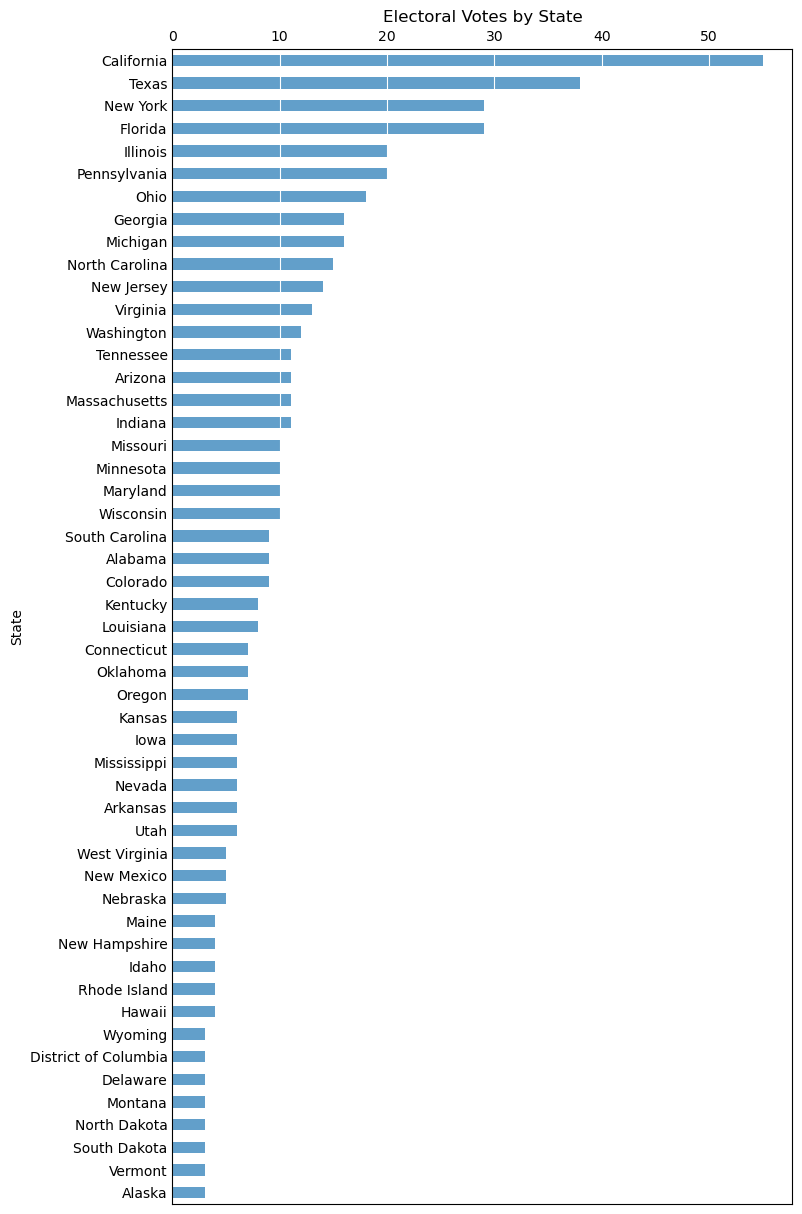

In [22]:
# get non-global figure and axis
fig, ax = plt.subplots(figsize = (8, 15))
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.7) 
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# remove both axis ticks
ax.tick_params(axis="both",
               which='both', #major and minor ticks
               length=0) # set to 0
# set labels on top
ax.tick_params(axis="x",
               labeltop=True,
                labelbottom=False)
# need to have something to replace x-axis ticks
# use a grid instead
ax.grid(axis = 'x', color ='white', linestyle='-')

Do the spines add anything to our presentation? No! The elements of the figure are strong enough to stand by themselves. Ok, so lets remove the spines...

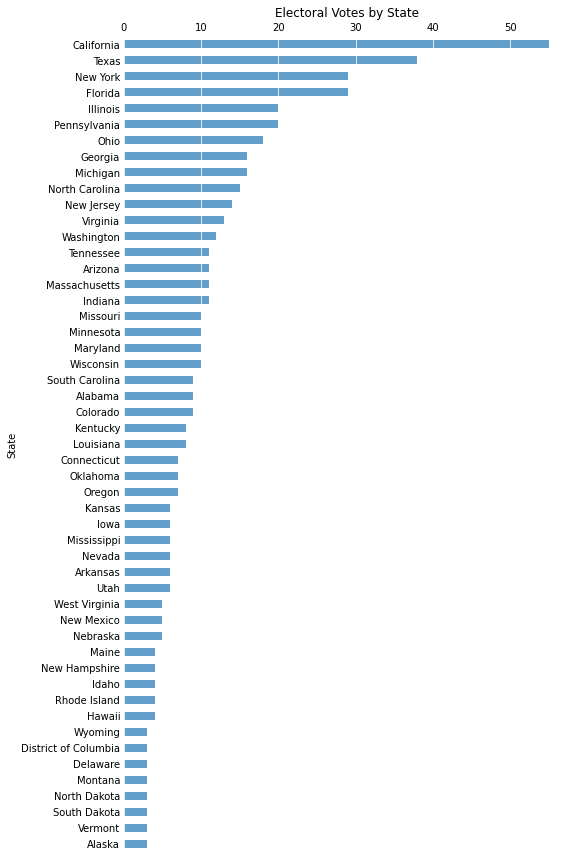

In [13]:
# get non-global figure and axis
fig, ax = plt.subplots(figsize = (8, 15))
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.7) 
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# remove both axis ticks
ax.tick_params(axis="both",
               which='both', #major and minor ticks
               length=0) # set to 0
# set labels on top
ax.tick_params(axis="x",
               labeltop=True,
                labelbottom=False)
# need to have something to replace x-axis ticks
# use a grid instead
ax.grid(axis = 'x', color ='white', linestyle='-')
# do we really need the spines?
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

If you want to show more precise distinctions between the states' electoral votes, you want the grid to be more fine grained. So lets have a tick every 5 votes, which translates in our grid visual to a grid line every 5 votes.

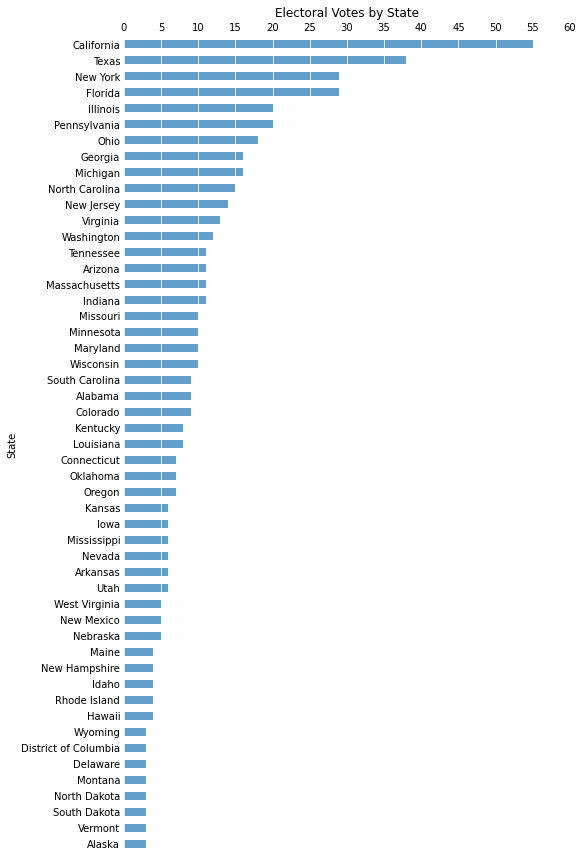

In [14]:
# get non-global figure and axis
fig, ax = plt.subplots(figsize = (8, 15))
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.7) 
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# remove both axis ticks
ax.tick_params(axis="both",
               which='both', #major and minor ticks
               length=0) # set to 0
# set labels on top
ax.tick_params(axis="x",
               labeltop=True,
                labelbottom=False)
# need to have something to replace x-axis ticks
# use a grid instead
ax.grid(axis = 'x', color ='white', linestyle='-')
# do we really need the spines?
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# have more x-axis ticks for easier readoff
start, stop = ax.get_xlim()
ticks = np.arange(start, stop + 5, 5)
ax.set_xticks(ticks);

The grid line labels look entirely redundant. After all, we can count off the grid-lines. So lets get rid of them, and eliminate the clutter. And then, why not show the user the electoral votes for each state at the end of its bar? Dont make the user think!

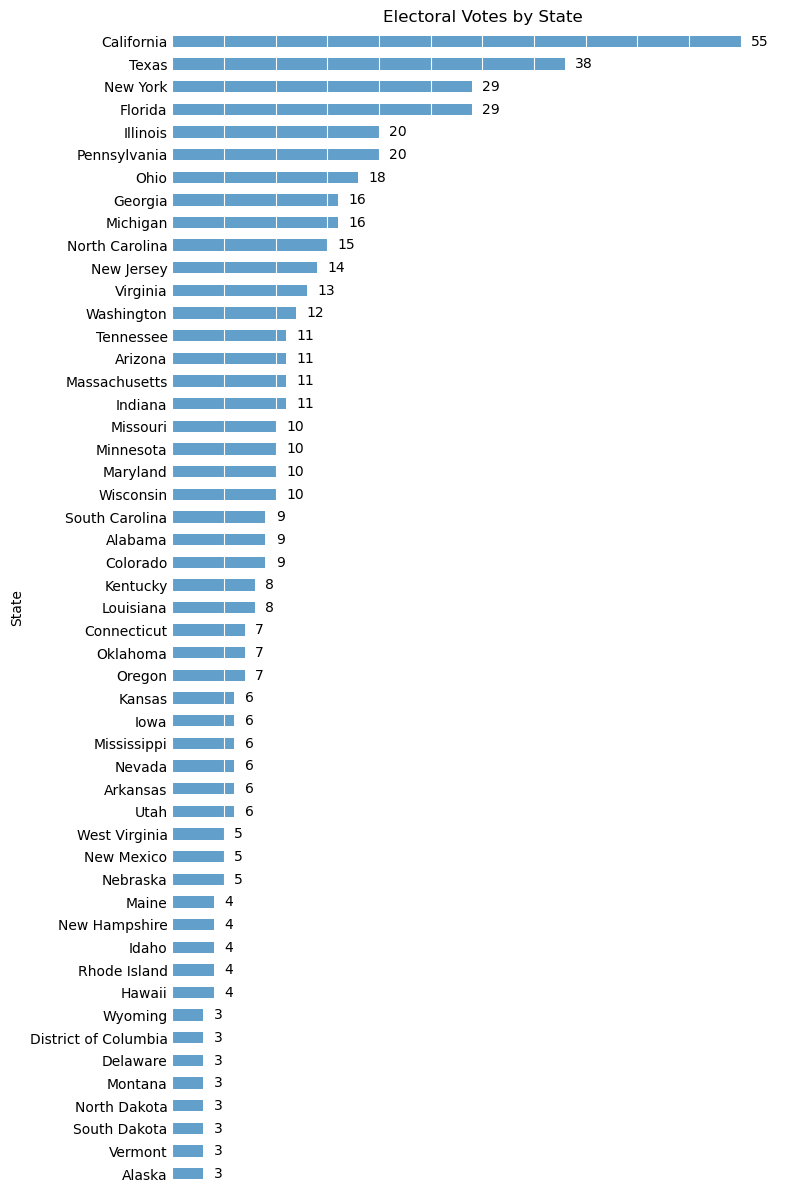

In [24]:
# get non-global figure and axis
fig, ax = plt.subplots(figsize = (8, 15))
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.7) 
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# remove both axis ticks
ax.tick_params(axis="both",
               which='both', #major and minor ticks
               length=0) # set to 0
# get rid of labels in favor of annotations
ax.set_xticklabels([])
for idx, statename, evotes in zip(range(votesasc.shape[0]), 
                                  votesasc.index, 
                                  votesasc.values):
    ax.annotate(evotes, xy=(evotes + 1, idx), va='center')
# need to have something to replace x-axis ticks
# use a grid instead
ax.grid(axis = 'x', color ='white', linestyle='-')
# do we really need the spines?
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# have more x-axis ticks for easier readoff
start, stop = ax.get_xlim()
ticks = np.arange(start, stop + 5, 5)
ax.set_xticks(ticks);

## The final plots

We clean up the layout-ing.

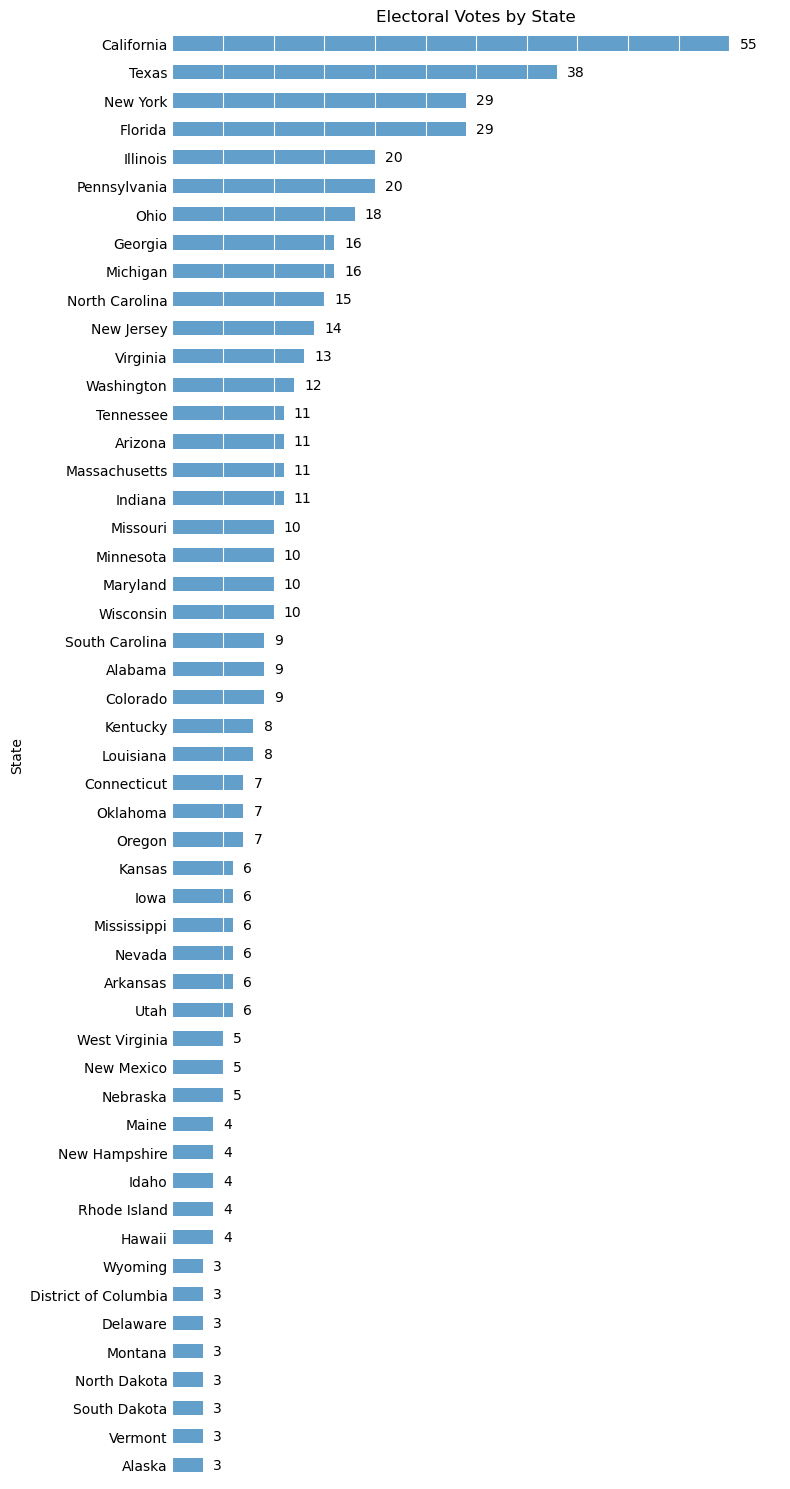

In [23]:
# get non-global figure and axis
fig, ax = plt.subplots(figsize = (8, 15))
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.7) 
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# remove both axis ticks
ax.tick_params(axis="both",
               which='both', #major and minor ticks
               length=0) # set to 0
# get rid of labels in favor of annotations
ax.set_xticklabels([])
for idx, statename, evotes in zip(range(votesasc.shape[0]), 
                                  votesasc.index, 
                                  votesasc.values):
    # annotate with votes AFTER bar and at the index on y-axis
    ax.annotate(evotes, xy=(evotes + 1, idx), va='center')
# need to have something to replace x-axis ticks
# use a grid instead
ax.grid(axis = 'x', color ='white', linestyle='-')
# do we really need the spines?
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# have more x-axis ticks for easier readoff
start, stop = ax.get_xlim()
ticks = np.arange(start, stop + 5, 5)
ax.set_xticks(ticks);
# Beautify
fig.tight_layout()

And save the image transparently, so that it can be put on any web page.

In [25]:
fig.savefig("barchart.png", transparent=True)

and you can even set the background color to be different in matplotlib itself, by changing the face color of the figure, and then those of the axes.

An incredible source to learn the ins and outs of @matplotlib is https://end-to-end-machine-learning.teachable.com/p/navigating-matplotlib-tutorial-how-to/ by @brohrer . I teach this stuff as well, as part of the Data Science courses at [Univ.AI](https://univ.ai).

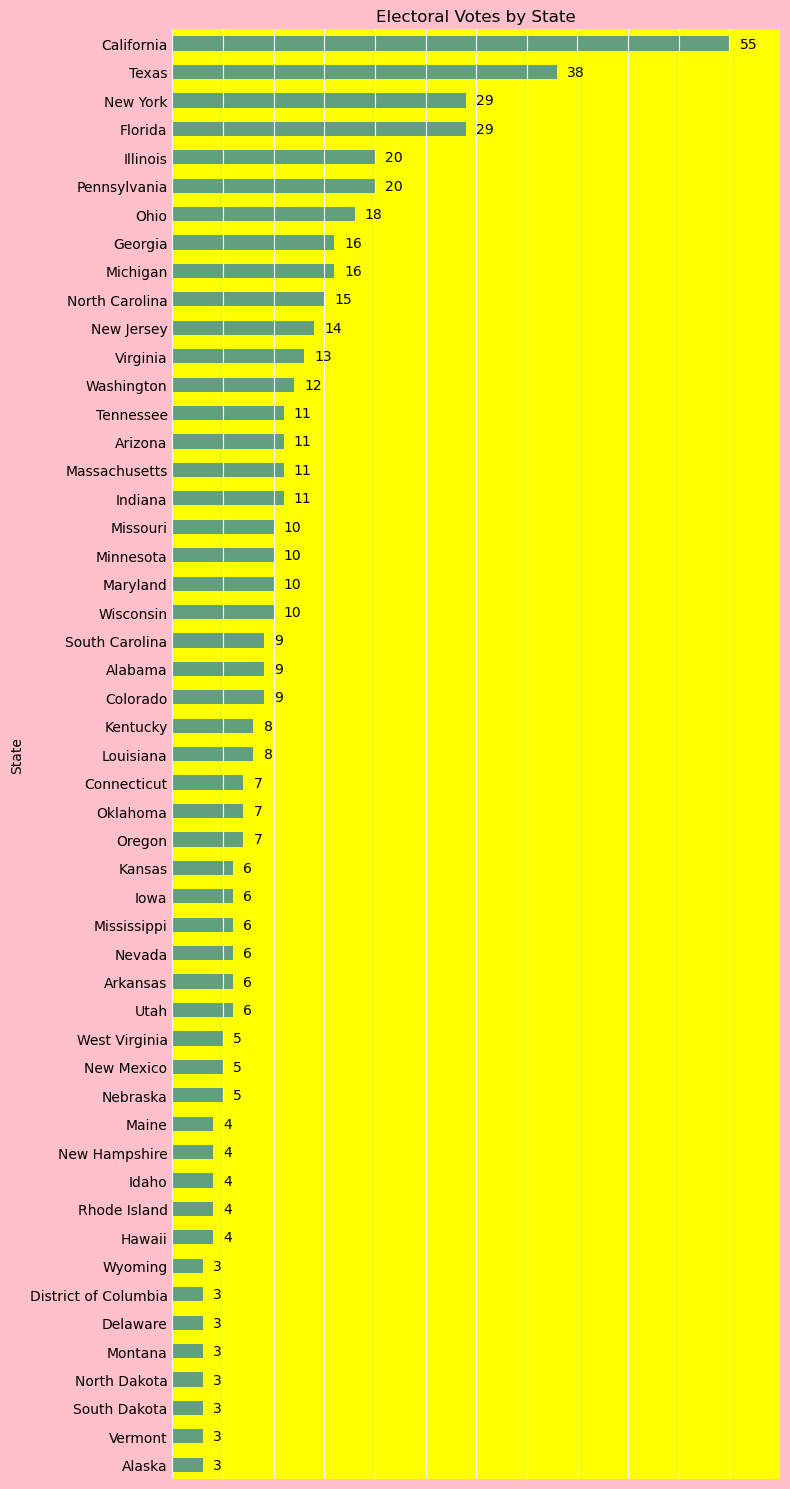

In [26]:
fig, ax = plt.subplots(figsize = (8, 15), facecolor="pink")
ax.set_facecolor("yellow") #Or use this fig.get_facecolor()
# get pandas to plot inside the current axis
votesasc.plot.barh(ax=ax, alpha=0.7) 
# (alpha sets the transparency)
# Set the title
ax.set_title("Electoral Votes by State")
# remove both axis ticks
ax.tick_params(axis="both",
               which='both', #major and minor ticks
               length=0) # set to 0
# get rid of labels in favor of annotations
ax.set_xticklabels([])
for idx, statename, evotes in zip(range(votesasc.shape[0]), 
                                  votesasc.index, 
                                  votesasc.values):
    # annotate with votes AFTER bar and at the index on y-axis
    ax.annotate(evotes, xy=(evotes + 1, idx), va='center')
# need to have something to replace x-axis ticks
# use a grid instead
ax.grid(axis = 'x', color ='white', linestyle='-')
# do we really need the spines?
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# have more x-axis ticks for easier readoff
start, stop = ax.get_xlim()
ticks = np.arange(start, stop + 5, 5)
ax.set_xticks(ticks);
# Beautify
fig.tight_layout()

In [27]:
fig.savefig("pinkbarchart.png")